# CALL OF DUTY PLAYERS (K-MEANS)

## INTRODUÇÃO

>*Combate terrestre com ação intensa. Os cenários mais fotorrealistas de sempre da série. Inclui Killstreaks e os modos multijogador preferidos dos jogadores. Personalização de armas ao pormenor. A melhor jogabilidade do seu género (callofduty.com)*

Conjunto de dados que contém o comportamento de jogadores do game multiplayer Call of Duty: Modern Warfare.

**Objetivo:** Encontrar segmentos de jogadores conforme seu comportamento no game.

**Dataset:**https://www.kaggle.com/aishahakami/call-of-duty-players

## 1. IMPORTANDO PACOTES E DADOS

In [1]:
# Importar pacotes
library(factoextra)
library(cluster)
library(fpc)
library(NbClust)
library(clValid)
library(magrittr)
library(clustertend)
library(tidyverse)
library(gridExtra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'cluster' was built under R version 3.6.3"Warning message:
"package 'fpc' was built under R version 3.6.3"Warning message:
"package 'clValid' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ---------------------------------------------------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"

In [2]:
# Carregando os dados
df_cod<- read.csv("dados/cod.csv")

In [3]:
# Visualizar as seis primeiras linhas do dataset
head(df_cod)

name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000,0,0
JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000,0,16
bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000,0,64
JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000,0,5
gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000,0,10
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672,403651,25321


In [4]:
# Visualizar as seis últimas linhas do dataset
tail(df_cod)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,LokiiFN#2367402,0,0,0.0000000,0,1,0,0,0,1,0,1,0,0,0,200,0.0,0,2
1554,ImranePROPG#2085215,0,51,0.4322034,0,10,0,110,0,71,11,71,0,0,0,49935,0.0,0,118
1555,Miguel_mor#1492856,0,0,0.0000000,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0
1556,Trianthor#3462590,0,0,0.0000000,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0
1557,tinytrex594#3976133,0,0,0.0000000,0,1,0,0,2,1,0,1,0,1,7,0,91.2,9,0
1558,TomasFJ_05#2711069,1,35,0.6862745,3,5,1,110,17,10,6,10,1,11,63,17126,39.0,80,51


In [5]:
names(df_cod)

[1] "name"           "wins"           "kills"          "kdRatio"       
 [5] "killstreak"     "level"          "losses"         "prestige"      
 [9] "hits"           "timePlayed"     "headshots"      "averageTime"   
[13] "gamesPlayed"    "assists"        "misses"         "xp"            
[17] "scorePerMinute" "shots"          "deaths"

In [6]:
# Sumário dos dados
summary(df_cod)

                  name           wins          kills            kdRatio      
 _Loki_23#6617235   :   1   Min.   :   0   Min.   :    0.0   Min.   :0.0000  
 052397#4248023     :   1   1st Qu.:   0   1st Qu.:    4.0   1st Qu.:0.2614  
 07999854292#2183402:   1   Median :  10   Median :  191.5   Median :0.7328  
 09771#8158362      :   1   Mean   : 153   Mean   : 3753.0   Mean   :0.6371  
 136_Luca#5240574   :   1   3rd Qu.: 168   3rd Qu.: 3445.8   3rd Qu.:0.9553  
 207LucasM#4976565  :   1   Max.   :3519   Max.   :66935.0   Max.   :3.0000  
 (Other)            :1552                                                    
   killstreak          level            losses          prestige     
 Min.   :  0.000   Min.   :  1.00   Min.   : 0.000   Min.   :  0.00  
 1st Qu.:  0.000   1st Qu.:  1.00   1st Qu.: 0.000   1st Qu.:  0.00  
 Median :  5.000   Median : 11.00   Median : 2.000   Median : 14.00  
 Mean   :  6.895   Mean   : 44.41   Mean   : 4.998   Mean   : 47.66  
 3rd Qu.: 12.000   3rd Qu.

In [7]:
# Checar a presença de NAs
sapply(df_cod, function(x) sum(is.na(x)))

name           wins          kills        kdRatio     killstreak 
             0              0              0              0              0 
         level         losses       prestige           hits     timePlayed 
             0              0              0              0              0 
     headshots    averageTime    gamesPlayed        assists         misses 
             0              0              0              0              0 
            xp scorePerMinute          shots         deaths 
             0              0              0              0

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

* Removeremos a primeira coluna (*ID*) pois não é relevante e útil para nosso modelo
* Iremos visualizar as variáveis com histogramas
* Realizaremos a padronização das variáveis

**Dicionário de variáveis**<br>
* name: Nome do jogador<br>
*wins: Número de vitórias<br>
*kills: Número de mortes realizadas<br>
*kdRatio: Razão entre mortes realizadas e mortes sofridas<br>
*killstreak: Matar vários inimigos sem morrer<br>
*level: Nível do jogador<br>
*losses: Número de derrotas<br>
*prestige: Modo opcional obtido ao chegar ao Level 55<br>
*hits: Número de vezes que acertou outro jogador<br>
*timePlayed: Tempo gasto no jogo<br>
*headshots: Número de tiros que acertaram a cabeça do oponente<br>
*averageTime: Tempo médio<br>
*gamesPlayed: Número de partidas jogadas<br>
*assists: Número de vezes que o jogador acerta um oponente mas um integrante de seu time o mata<br>
*misses: Número de vezes que o jogador erra um tiro<br>
*xp: Pontos de experiência<br>
*scorePerMinute: Pontos ganhos por minuto<br>
*shots: Número de tiros<br>
*deaths: Número de mortes<br>

In [8]:
# Retirando a primeira coluna (ID)
df_cod_v1<- df_cod[,-1]

In [9]:
# Plotando a variável wins
plot1<-df_cod %>%
ggplot(aes(wins)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Wins",x=NULL,y=NULL)

In [10]:
# Plotando a variável kills
plot2<-df_cod %>%
ggplot(aes(kills)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Kills",x=NULL,y=NULL)

In [11]:
# Plotando a variável kdRatio
plot3<-df_cod %>%
ggplot(aes(kdRatio)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="KdRatio",x=NULL,y=NULL)

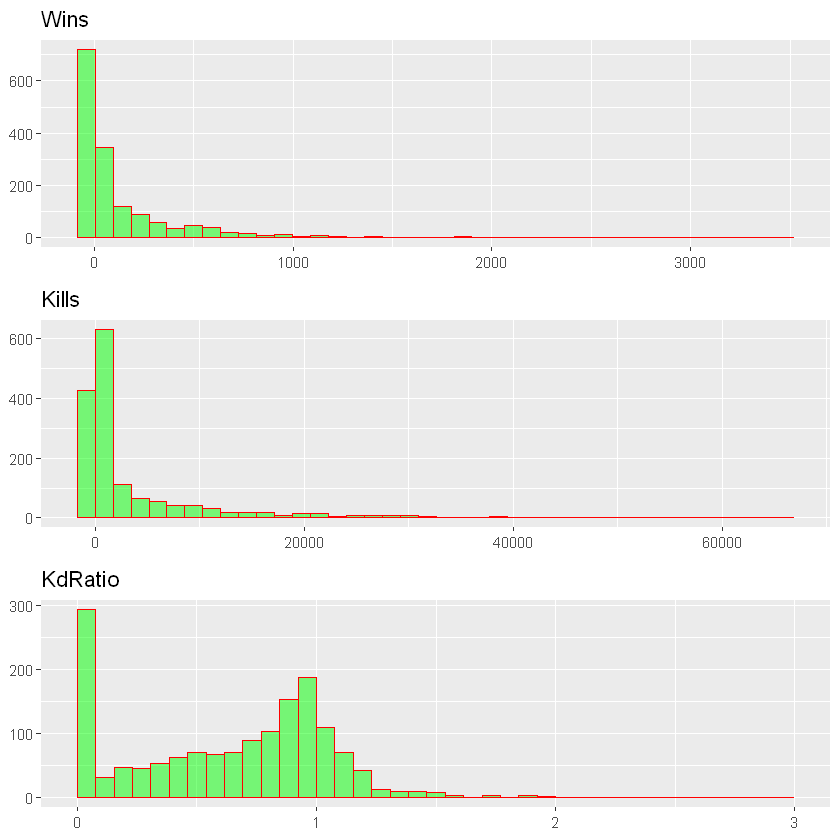

In [12]:
grid.arrange(plot1,plot2,plot3)

In [13]:
# Plotando a variável killstreak
plot4<-df_cod %>%
ggplot(aes(killstreak)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Killstreak",x=NULL,y=NULL)

In [14]:
# Plotando a variável level
plot5<-df_cod %>%
ggplot(aes(level)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Level",x=NULL,y=NULL)

In [15]:
# Plotando a variável Losses
plot6<-df_cod %>%
ggplot(aes(losses)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Losses",x=NULL,y=NULL)

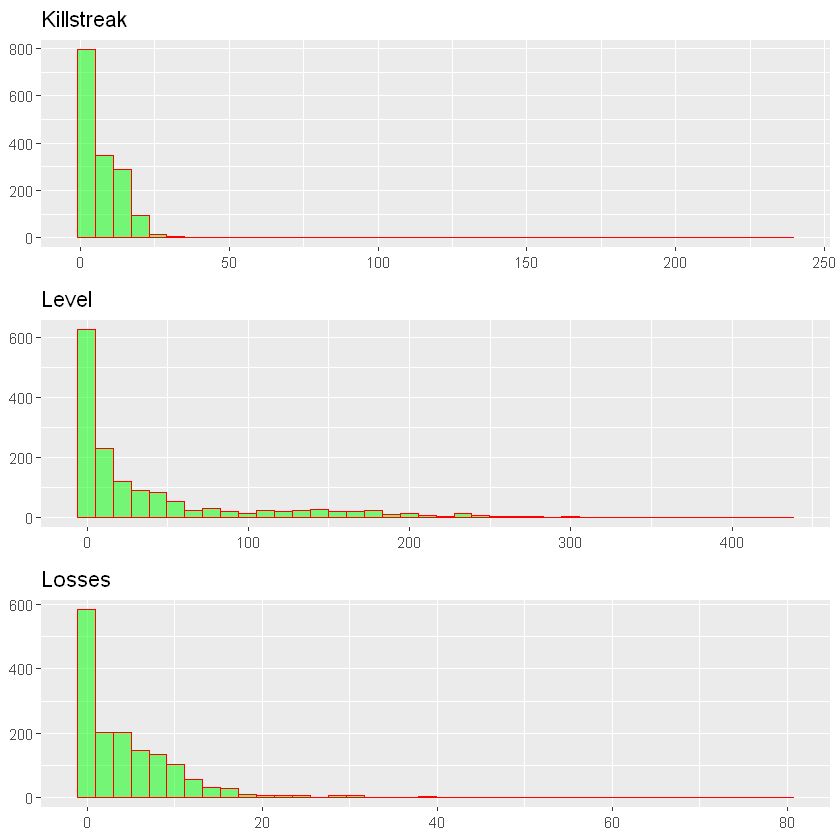

In [16]:
grid.arrange(plot4,plot5,plot6)

In [17]:
# Plotando a variável prestige
plot7<-df_cod %>%
ggplot(aes(prestige)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Prestige",x=NULL,y=NULL)

In [18]:
# Plotando a variável hits
plot8<-df_cod %>%
ggplot(aes(hits)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Hits",x=NULL,y=NULL)

In [19]:
# Plotando a variável timePlayed
plot9<-df_cod %>%
ggplot(aes(timePlayed)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="TimePlayed",x=NULL,y=NULL)

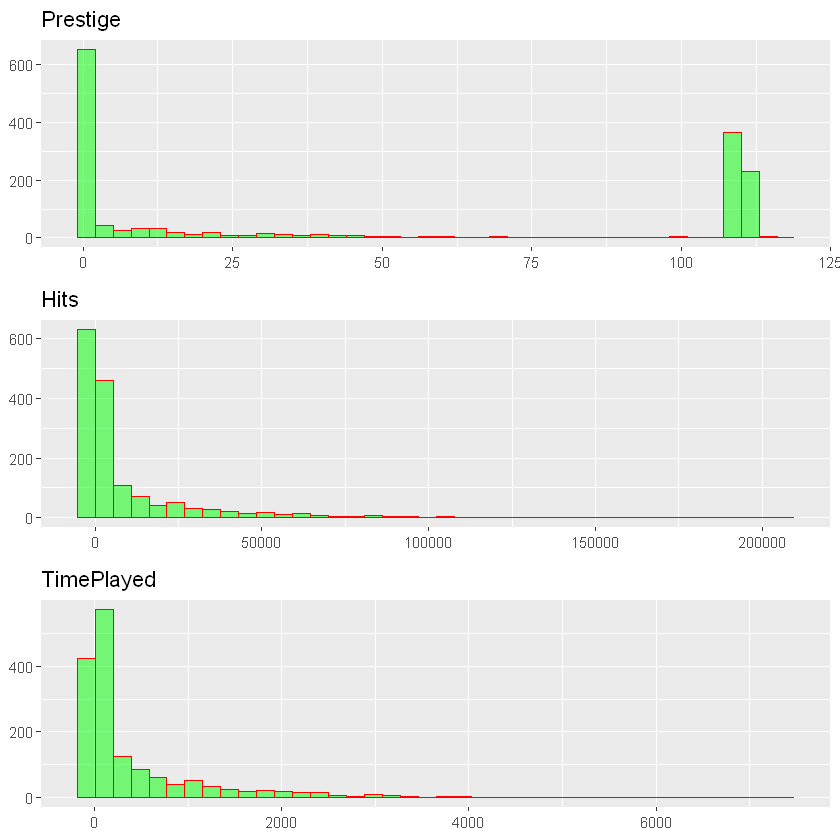

In [20]:
grid.arrange(plot7,plot8,plot9)

In [21]:
# Plotando a variável headshots
plot10<-df_cod %>%
ggplot(aes(headshots)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Headshots",x=NULL,y=NULL)

In [22]:
# Plotando a variável averageTime
plot11<-df_cod %>%
ggplot(aes(averageTime)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="AverageTime",x=NULL,y=NULL)

In [23]:
# Plotando a variável gamesPlayed
plot12<-df_cod %>%
ggplot(aes(gamesPlayed)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="GamesPlayed",x=NULL,y=NULL)

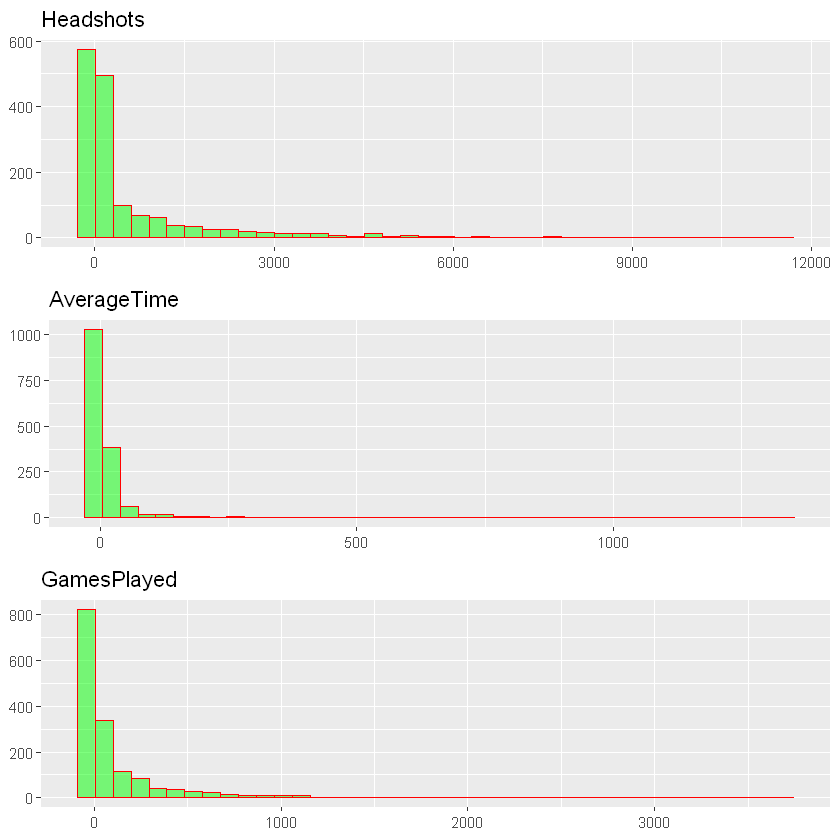

In [24]:
grid.arrange(plot10,plot11,plot12)

In [25]:
# Plotando a variável assists
plot13<-df_cod %>%
ggplot(aes(assists)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Assists",x=NULL,y=NULL)

In [26]:
# Plotando a variável misses
plot14<-df_cod %>%
ggplot(aes(misses)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Misses",x=NULL,y=NULL)

In [27]:
# Plotando a variável xp
plot15<-df_cod %>%
ggplot(aes(xp)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Xp",x=NULL,y=NULL)

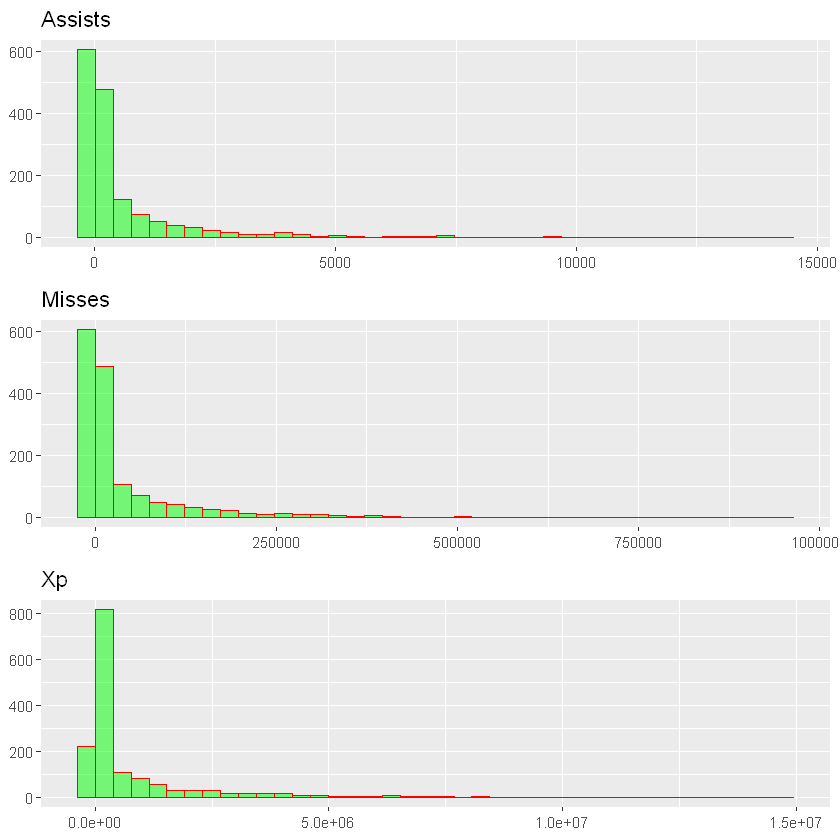

In [28]:
grid.arrange(plot13,plot14,plot15)

In [29]:
# Plotando a variável scorePerMinute
plot16<-df_cod %>%
ggplot(aes(scorePerMinute)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="ScorePerMinute",x=NULL,y=NULL)

In [30]:
# Plotando a variável shots
plot17<-df_cod %>%
ggplot(aes(shots)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Shots",x=NULL,y=NULL)

In [31]:
# Plotando a variável deaths
plot18<-df_cod %>%
ggplot(aes(deaths)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Deaths",x=NULL,y=NULL)

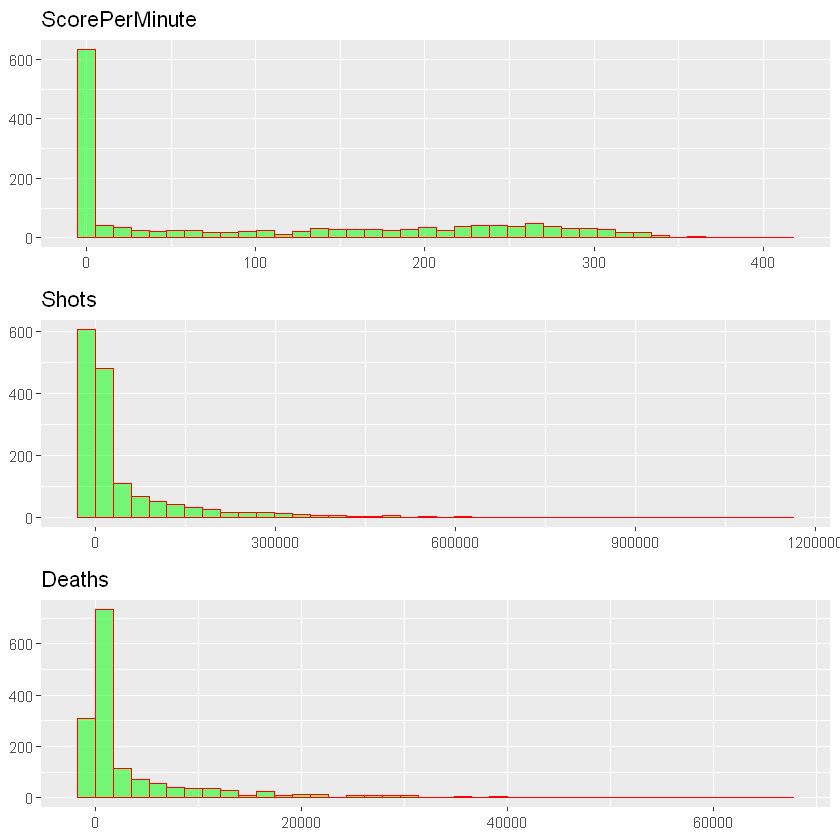

In [32]:
grid.arrange(plot16,plot17,plot18)

In [33]:
# Padronizando as variáveis
df_cod_v1_scaled<- scale(df_cod_v1)

In [34]:
# Visualizando as seis primeiras linhas dos dados padronizados
head(df_cod_v1_scaled)

wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
-0.5066566,-0.4732844,-1.4800427,-0.6770346,-0.6354781,-0.7134218,-0.9231212,-0.4500367,-0.5417520,-0.4832184,-0.2592984,-0.4552119,-0.4516626,-0.463204,-0.4859425,-0.9257007,-0.462972,-0.4848692
-0.5066566,-0.4732844,-1.4800427,-0.6770346,-0.6354781,-0.7134218,1.2075793,-0.4500367,-0.5328482,-0.4832184,-0.1745936,-0.4552119,-0.4516626,-0.463204,-0.4855527,-0.9257007,-0.462972,-0.4828674
-0.5066566,-0.4649613,0.9156540,-0.6770346,-0.5183788,-0.7134218,1.2075793,-0.4500367,-0.5010490,-0.4709593,0.1279233,-0.4552119,-0.4510040,-0.463204,-0.4590457,-0.9257007,-0.462972,-0.4768619
-0.4967223,-0.4730322,-0.5508028,-0.6770346,-0.6354781,-0.7134218,-0.9231212,-0.4500367,-0.5379361,-0.4832184,-0.2229963,-0.4552119,-0.4516626,-0.463204,-0.4853021,-0.9257007,-0.462972,-0.4842436
-0.5066566,-0.4730322,-1.0154227,-0.6770346,-0.6354781,-0.7134218,1.2075793,-0.4500367,-0.5353921,-0.4824522,-0.1987950,-0.4552119,-0.4516626,-0.463204,-0.4853856,-0.9257007,-0.462972,-0.4836181
1.7583583,2.9330249,0.9981078,1.0903263,1.9407073,0.7139715,1.2075793,3.8338159,1.1957581,3.4343378,-0.2311869,1.8384839,3.5413989,2.654860,1.7038526,1.2684066,2.892926,2.6831599


## 3. CONSTRUINDO O MODELO

* Avaliaremos a agrupabilidade dos dados com a estatística Hopkins
* Determinando o número de clusters

In [35]:
# Aplicando a estatística hopkins
hopkins(df_cod_v1_scaled, n=nrow(df_cod_v1_scaled)-1)

$H
[1] 0.03418704

In [36]:
# Determinando o número de clusters opção 1
num_clusters_opt1 <- NbClust(df_cod_v1_scaled,  
                             distance = "euclidean",
                             min.nc = 2, 
                             max.nc = 15, 
                             method = "kmeans",
                             index = "silhouette")

In [37]:
# Número de clusters
num_clusters_opt1$Best.nc

Number_clusters     Value_Index 
         2.0000          0.6112

Warning message in pf(beale, pp, df2):
"NaNs produzidos"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


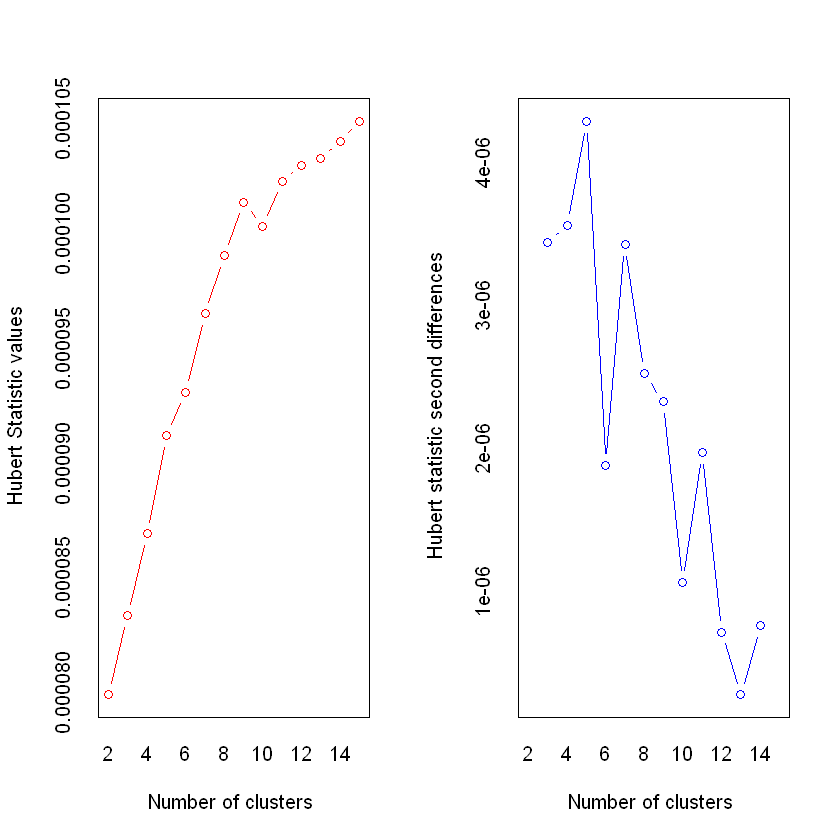

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


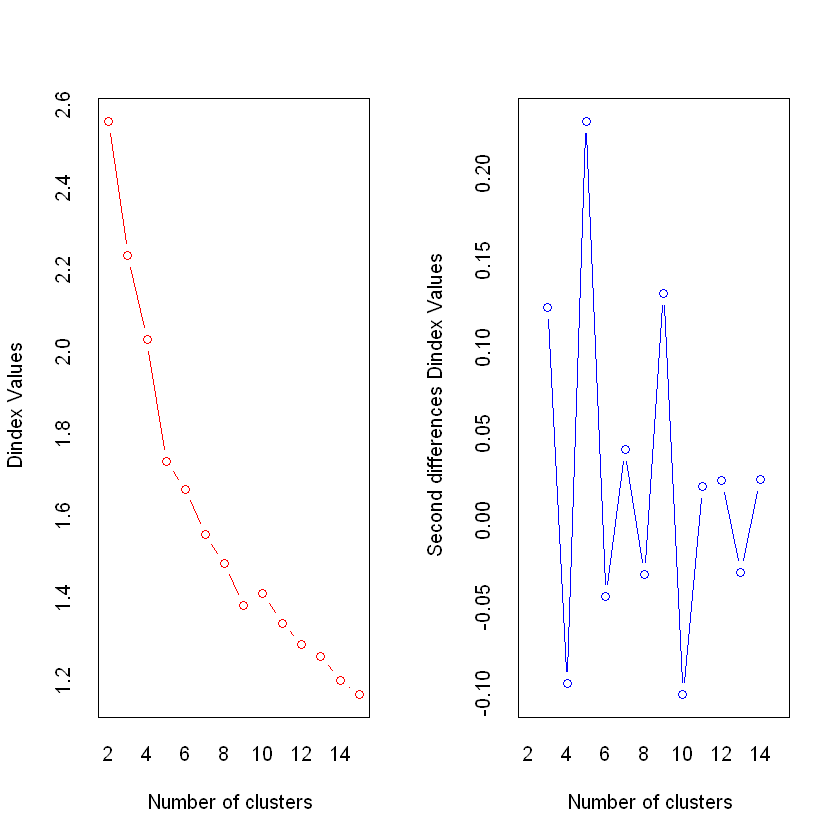

In [38]:
# Determinando o número de clusters opção 2
num_clusters_opt2 <- NbClust(df_cod_v1_scaled,  
                             distance = "euclidean", 
                             min.nc = 2, 
                             max.nc = 15, 
                             method = "kmeans",
                             index = "all")


* **MODELO 1**

* Iremos utilizar k= 2, pois este foi o número ideal de clusters encontrado pela função NbClust()

In [39]:
# Construindo modelo 1
model_v1<- kmeans(df_cod_v1_scaled,2)

In [40]:
# Visualizando modelo 1
print(model_v1)

K-means clustering with 2 clusters of sizes 1348, 210

Cluster means:
        wins      kills    kdRatio killstreak      level     losses   prestige
1 -0.3106855 -0.3244238 -0.1368898 -0.1885775 -0.3180807 -0.2410478 -0.1325721
2  1.9943053  2.0824916  0.8787022  1.2104881  2.0417752  1.5472973  0.8509868
        hits timePlayed headshots averageTime gamesPlayed    assists     misses
1 -0.3098037 -0.3086192 -0.322514  0.03246721  -0.3052609 -0.3089434 -0.3133234
2  1.9886447  1.9810416  2.070233 -0.20840859   1.9594843  1.9831224  2.0112378
         xp scorePerMinute      shots     deaths
1 -0.303782     -0.1104830 -0.3141951 -0.3212977
2  1.949991      0.7091957  2.0168334  2.0624254

Clustering vector:
   [1] 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [41]:
# Verificando o tamanho dos clusters
model_v1$size

[1] 1348  210

In [42]:
# Criando coluna de clusters ao dataset
df_cod_v1$Cluster <- model_v1$cluster

In [43]:
# Visualizando as seis primeiras linhas do dataset
head(df_cod_v1)

wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000,0,0,1
0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000,0,16,1
0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000,0,64,1
3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000,0,5,1
0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000,0,10,1
684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672,403651,25321,2


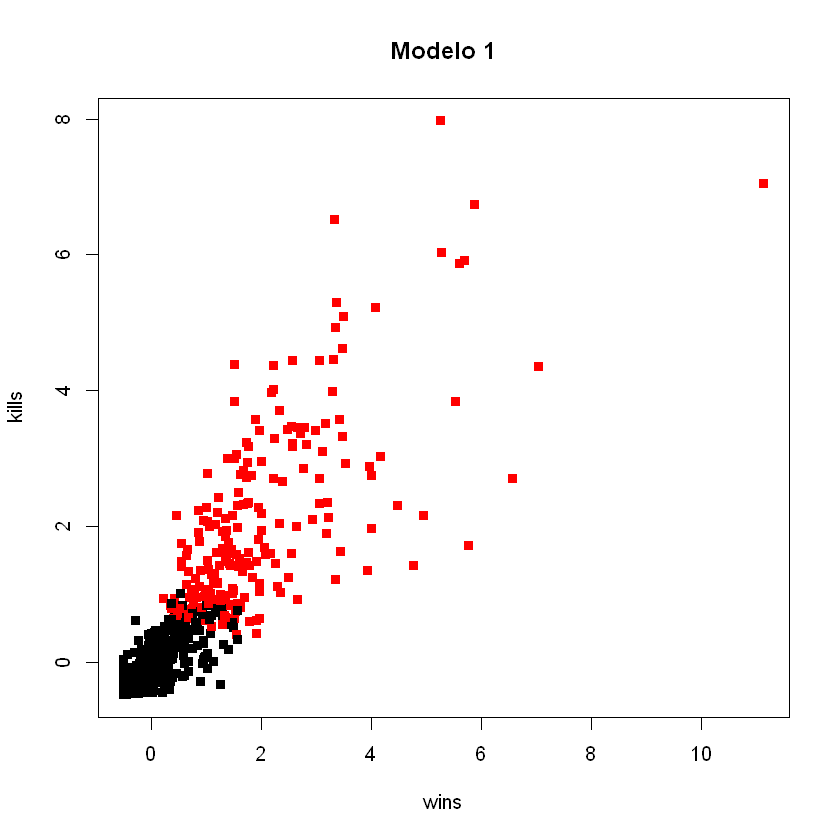

In [44]:
# Plotando o modelo 1
plot(df_cod_v1_scaled, col=model_v1$cluster,pch=15,main="Modelo 1")

In [45]:
# Melhorando a visualização
cluster_viz<- eclust(df_cod_v1_scaled, "kmeans",
                     k=2,nstart=25,graph=F)

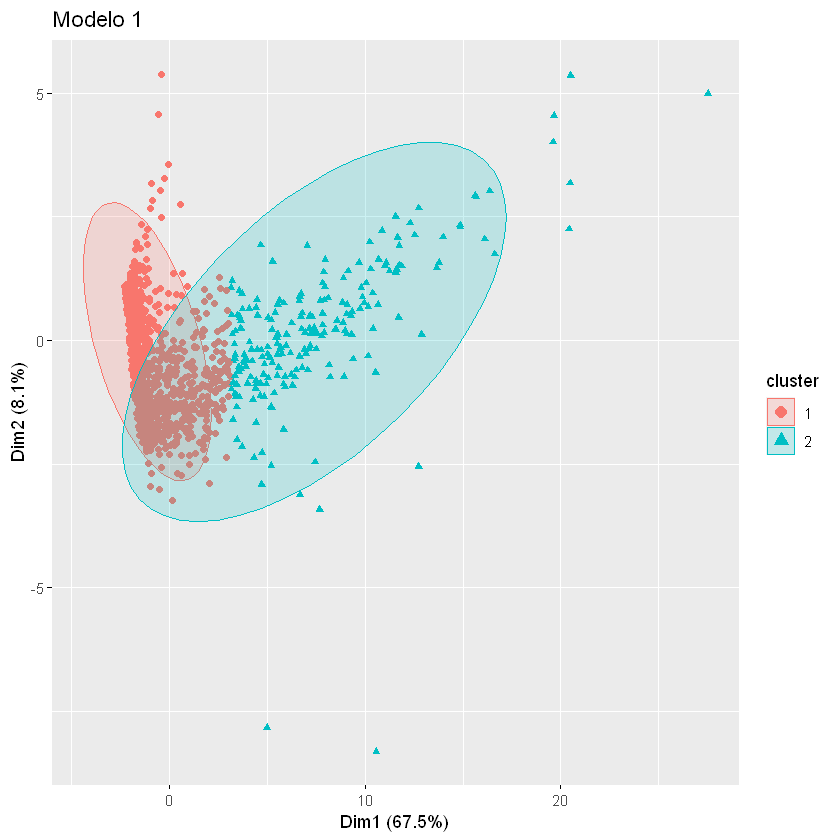

In [46]:
# Plotando Clusters K-Means
fviz_cluster(cluster_viz,geom="point",
             ellipse.type="norm", main="Modelo 1")

* **MODELO 2**

* Como o dataset possui informações sobre o comportamento dos jogadores de um game multiplayer, é razoável considerar três categorias de jogadores, a saber: novatos, intermediários e avançados. Assim, iremos estabelecer k=3.

In [47]:
# Construindo Modelo 2
model_v2<- kmeans(df_cod_v1_scaled,3)

In [48]:
# Visualizando modelo 2
print(model_v2)

K-means clustering with 3 clusters of sizes 326, 100, 1132

Cluster means:
        wins      kills    kdRatio killstreak      level     losses   prestige
1  0.6301171  0.5395821  0.8069612  0.7939590  0.8705595  0.9565408  0.6931453
2  2.8485789  3.0977677  0.8913330  1.3672128  2.6071489  1.7345577  0.9369803
3 -0.4331061 -0.4290464 -0.3111331 -0.3494275 -0.4810223 -0.4286997 -0.2823882
        hits timePlayed  headshots averageTime gamesPlayed    assists
1  0.5087581  0.6900254  0.5919133 -0.14504137   0.5393954  0.4782675
2  2.9952587  2.7616413  3.0043491 -0.21756426   2.8972507  3.0425330
3 -0.4111140 -0.4426788 -0.4358645  0.06098932  -0.4112791 -0.4065093
      misses         xp scorePerMinute      shots     deaths
1  0.5328485  0.5982308      0.6456547  0.5308729  0.5523293
2  3.0113340  2.7886721      0.7838940  3.0230996  3.0707464
3 -0.4194718 -0.4186311     -0.2551880 -0.4199422 -0.4303304

Clustering vector:
   [1] 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 1 1 2 1 1 3 3 3 3 3 3 1 3 3 

In [49]:
# Verificando o tamanho dos clusters
model_v2$size

[1]  326  100 1132

In [50]:
# Criando coluna de clusters ao dataset
df_cod_v1$Cluster2 <- model_v2$cluster

In [51]:
# Visualizar as seis primeiras linhas do dataset
head(df_cod_v1)

wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster,Cluster2
0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000,0,0,1,3
0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000,0,16,1,3
0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000,0,64,1,3
3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000,0,5,1,3
0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000,0,10,1,3
684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672,403651,25321,2,2


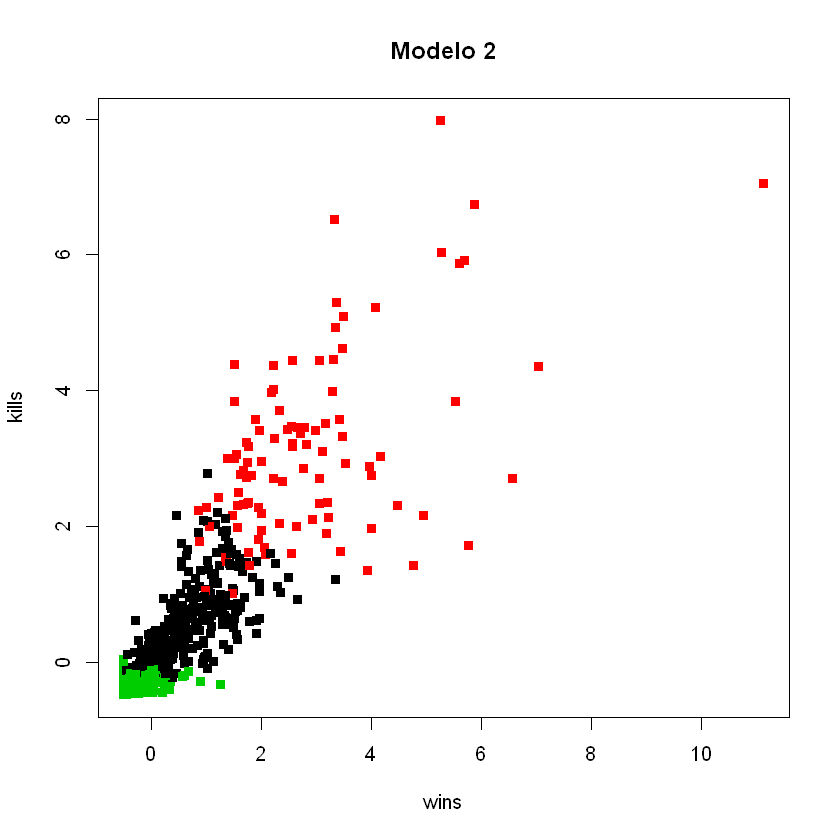

In [52]:
# Plotando modelo 2
plot(df_cod_v1_scaled,col=model_v2$cluster,pch=15,main="Modelo 2")

In [53]:
# Melhorando a visualização
cluster_viz <- eclust(df_cod_v1_scaled,
                      "kmeans", k = 3, nstart = 25, graph = FALSE)

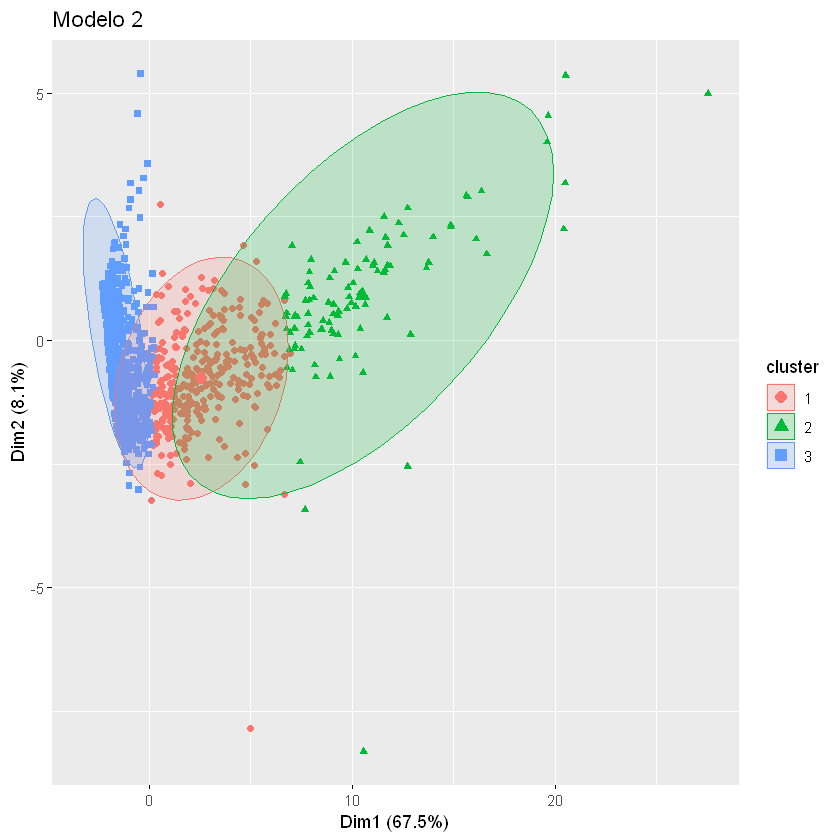

In [54]:
# Plotando Clusters K-Means
fviz_cluster(cluster_viz, geom = "point", ellipse.type = "norm",main="Modelo 2")

DIEGO RAMIREZ<br>
daarfarias@hotmail.com<br>
https://github.com/daarfarias